# **Notebook de Ejs. Prácticos**

In [1]:
# Instalar librerías necesarias
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install tensorflow
!pip install keras
!pip install deap


[notice] A new release of pip available: 22.3 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Librerías para cargar datos, dividir conjuntos, escalar y evaluar modelos
from sklearn.datasets import load_iris
from sklearn.datasets import make_moons

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt

from deap import base, creator, tools, algorithms
import random
import itertools

from pathlib import Path
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
import urllib.request

import tensorflow as tf
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from keras.models import Sequential
from keras.optimizers import Adam
from keras.datasets import cifar10
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Rescaling, RandomFlip, RandomRotation, RandomZoom, GlobalAveragePooling2D, RandomContrast, Flatten

# Práctica 1 - Ejercicio 6
---
### Considere el Problema del Agente Viajero (TSP) del ejercicio 4, considere ahora que cada ruta tiene un valor de tiempo asociado debido al tráfico o estado de la ruta. Implemente un MOGA que retorne las mejores soluciones (frente de pareto).

gen	nevals	avg                                   	min         	max         
0  	30    	(57.93333333333333, 53.56666666666667)	(24.0, 28.0)	(88.0, 77.0)
1  	23    	(53.86666666666667, 49.06666666666667)	(24.0, 28.0)	(75.0, 77.0)
2  	27    	(47.833333333333336, 48.266666666666666)	(24.0, 28.0)	(75.0, 77.0)
3  	24    	(43.53333333333333, 45.13333333333333)  	(24.0, 28.0)	(75.0, 55.0)
4  	27    	(49.233333333333334, 41.56666666666667) 	(24.0, 28.0)	(74.0, 55.0)
5  	23    	(62.56666666666667, 34.36666666666667)  	(24.0, 28.0)	(74.0, 55.0)
6  	26    	(65.43333333333334, 32.833333333333336) 	(24.0, 28.0)	(74.0, 55.0)
7  	27    	(64.0, 33.6)                            	(24.0, 28.0)	(74.0, 55.0)
8  	22    	(65.06666666666666, 33.0)               	(24.0, 28.0)	(74.0, 55.0)
9  	23    	(61.733333333333334, 34.9)              	(24.0, 28.0)	(74.0, 55.0)
10 	19    	(58.03333333333333, 36.96666666666667)  	(24.0, 28.0)	(74.0, 55.0)
11 	24    	(60.43333333333333, 35.53333333333333)  	(24.0, 28.0)	(74.0

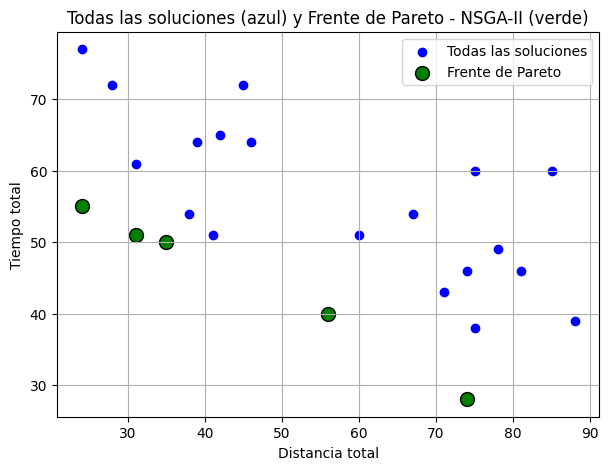

In [4]:
# [ACLARACIÓN]: para la resolución del ejercicio modelamos las ciudades con
# un grafo completo y no dirigido.

# hiperparametros
POPULATION_SIZE = 30  # tamaño de la población. El limite es la cant de permutaciones de las ciudades sin contar de la que se parte
GENERATIONS = 40      # cantidad de generaciones a evolucionar
CROSOVER_PROB = 0.8   # probabilidad de crossover
MUTATION_PROB = 0.04  # probabildiad de mutación
CANT_CITIES = 5       # cantidad de ciudades
START_CITY = 0        # ciudad de la que se parte

# matriz para guardar las distancias de una ciudad a otra
CITIES_DIST = [
#   0   1   2   3   4
   [0,  10, 40, 1 , 10], # 0
   [10, 0,  4,  12, 20], # 1
   [40, 4,  0,  6 , 4 ], # 2
   [1,  12, 6,  0 , 8 ], # 3
   [10, 3,  8,  9 , 0 ]  # 4
]

# matriz para guardar el tiempo asocidado de ir de una ciudad a otra por el tráfico
CITIES_TIMES = [
#    0  1   2  3   4
    [0, 20, 4, 12, 8 ], # 0
    [20, 0, 10, 6, 10], # 1
    [4, 10, 0, 16, 20], # 2
    [12, 6, 16, 0, 5 ], # 3
    [3,  9, 14, 10, 0]  # 4
]

# cada individuo/cromosoma es una lista que denota un posible recorrido.
# ej: el individuo [0,1,2,3,0] representa el recorrido de ir de la
# ciudad 0 a la 1, luego de la 1 a la 2, despues de la 2 a la 3 y
# finalmente de la 3 a la 0.

# definimos el tipo de fitness y el individuo
creator.create("FitnessMin", base.Fitness, weights=(-1.0,-1.0)) # queremos minimizar ambos objetivos
creator.create("Individual", list, fitness=creator.FitnessMin)

# toolbox para generar individuos y población
toolbox = base.Toolbox()

# para crear la población inicial lo que hago es obtener una lista con todas
# las ciudades menos la de arranque y luego voy generando una permutación
# aleatoria hasta completar la población. Al final antes de agregar un individuo
# le concateno la ciudad de donde se parte al principio y la final.
def create_population():
    cities = list(range(CANT_CITIES))
    cities.remove(START_CITY)
    poblacion = []

    for _ in range(POPULATION_SIZE):
        # genera una permutación aleatoria de las ciudades
        ruta_intermedia = random.sample(cities, len(cities))
        ruta = [START_CITY] + ruta_intermedia + [START_CITY]
        poblacion.append(creator.Individual(ruta))

    return poblacion

# la población es una lista de individuos
toolbox.register("population", create_population)

# obtener el costo de ir de la ciudad A a la B (distancia)
def get_cost(cityA, cityB):
    return CITIES_DIST[cityA][cityB]

# obtener el tiempo de ir de A y B
def get_time(cityA, cityB):
    return CITIES_TIMES[cityA][cityB]

# fitness costo por distancia
def evalCost(individual):
   cost = 0
   for i in range(CANT_CITIES):
       cost += get_cost(individual[i], individual[i+1])
   return cost

# fitness tiempo por tráfico
def evalTime(individual):
    time = 0
    for i in range(CANT_CITIES):
        time += get_time(individual[i], individual[i+1])
    return time

# evalua un individuo suando las 2 fitness
def eval(individual):
    return evalCost(individual), evalTime(individual)

toolbox.register("evaluate", eval)

# función de crossover usando 1 point crossover modificado. primero se
# excluye la ciudad de inicio para evitar crear individuos inválidos.
# Entonces se parten los 2 padres (padre1 y padre2) en un punto. Luego
# para generar el hijo1 se toma el primer pedazo del del padre1 y se rellena
# el resto con el padre2 de forma que no queden repetidos para evitar
# individuos inválidos. Luego para generar el hijo2 se toma la primer parte
# de padre2 y se rellena con el resto del padre1 de igual forma sin dejar
# ciudades repetidas.
def crossover(p1, p2):
    # excluyo la ciudad de inicio (y de fin)
    p1_inner = p1[1:-1]
    p2_inner = p2[1:-1]

    # genero el punto para partir:
    point = random.randint(1, len(p1_inner) - 1)

    # genero la primer mitad de cada hijo:
    offspring1 = [START_CITY] + p1_inner[:point]
    offspring2 = [START_CITY] + p2_inner[:point]

    # ahora relleno el resto de cada hijo con el otro padre respectivamente:
    for city in p2_inner:
        if city not in offspring1: # chequeo para evitar ciudades repetidas
            offspring1.append(city)
    for city in p1_inner:
        if city not in offspring2:
            offspring2.append(city)

    offspring1.append(START_CITY)
    offspring2.append(START_CITY)

    return creator.Individual(offspring1), creator.Individual(offspring2)

# registro la función crossover
toolbox.register("mate", crossover)

# operador de mutación: intercambia 2 ciudades de lugar menos
# la ciudad de inicio (y de fin que es la misma) para evitar individuos invalidos
def mutate(individual):
    index1 = random.randint(1, len(individual)-2)
    index2 = random.randint(1, len(individual)-2)
    individual[index1], individual[index2] = individual[index2], individual[index1]
    return individual,

# registro la función mutación
toolbox.register("mutate", mutate)   # mutation bit flip

# utilizo NSGA2 como algoritmo para la selección
toolbox.register("select", tools.selNSGA2)

# función para graficar todas las posibles soluciones y el frente de pareto que encontro NSGA-II
def graficar(hof):
    # genero todas las posibles soluciones (permutaciones)
    cities = list(range(CANT_CITIES))
    cities.remove(START_CITY)
    permutaciones = list(itertools.permutations(cities))
    permutaciones = [list(p) for p in permutaciones]

    todas_las_soluciones = []
    for perm in permutaciones:
        ruta = [START_CITY] + perm + [START_CITY]
        todas_las_soluciones.append(creator.Individual(ruta))

    # para cada individuo le calculo cada fitness y
    # genero todos los puntos (evalCost(i-esimo_individuo),evalTime(i-esimo_individuo))
    todas_eval = [eval(ind) for ind in todas_las_soluciones]

    # de todos los puntos obtengo los que estan en el frente de pareto
    pareto_eval = [ind.fitness.values for ind in hof]

    # listas para graficar
    xs_todas, ys_todas = [], []
    xs_pareto, ys_pareto = [], []

    for (x, y) in todas_eval:
        if (x, y) in pareto_eval: # si estan en el frente de pareto los guardo aca para pintar de verde
            xs_pareto.append(x)
            ys_pareto.append(y)
        else:                    # sino los guardo aca para pintar de azul
            xs_todas.append(x)
            ys_todas.append(y)

    # gráfico
    plt.figure(figsize=(7,5))
    plt.scatter(xs_todas, ys_todas, color='blue', label='Todas las soluciones')
    plt.scatter(xs_pareto, ys_pareto, color='green', s=100, edgecolor='black', label='Frente de Pareto')

    plt.xlabel('Distancia total')
    plt.ylabel('Tiempo total')
    plt.title('Todas las soluciones (azul) y Frente de Pareto - NSGA-II (verde)')
    plt.legend()
    plt.grid(True)
    plt.show()

def main():
    random.seed(42)
    pop = toolbox.population()
    hof = tools.ParetoFront()
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", lambda fits: tuple(sum(f)/len(f) for f in zip(*fits)))
    stats.register("min", lambda fits: tuple(min(f) for f in zip(*fits)))
    stats.register("max", lambda fits: tuple(max(f) for f in zip(*fits)))

    # evolucionar con NSGA-II
    algorithms.eaMuPlusLambda(pop, toolbox, mu=30, lambda_=30, cxpb=CROSOVER_PROB, mutpb=MUTATION_PROB, ngen=GENERATIONS, stats=stats, halloffame=hof, verbose=True)
    print("\n--- Frente de Pareto ---")
    for ind in hof:
        print(ind, ind.fitness.values)

    graficar(hof)
main()

# Práctica 2 - Ejercicio 4
---
### Visite esta [página](https://www.geeksforgeeks.org/machine-learning/dataset-for-linear-regression/) que dispone de varios dataset para aprender modelos de regresión. Seleccione uno y realice el procedimiento para generar un modelo de regresión que capture de la mejor manera posible el conocimiento de dataset elegido.

**** primeras filas del dataset: ****
  Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340

**** información del dataset: ****
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB
None

**** estadísticas descriptivas: ****
            W

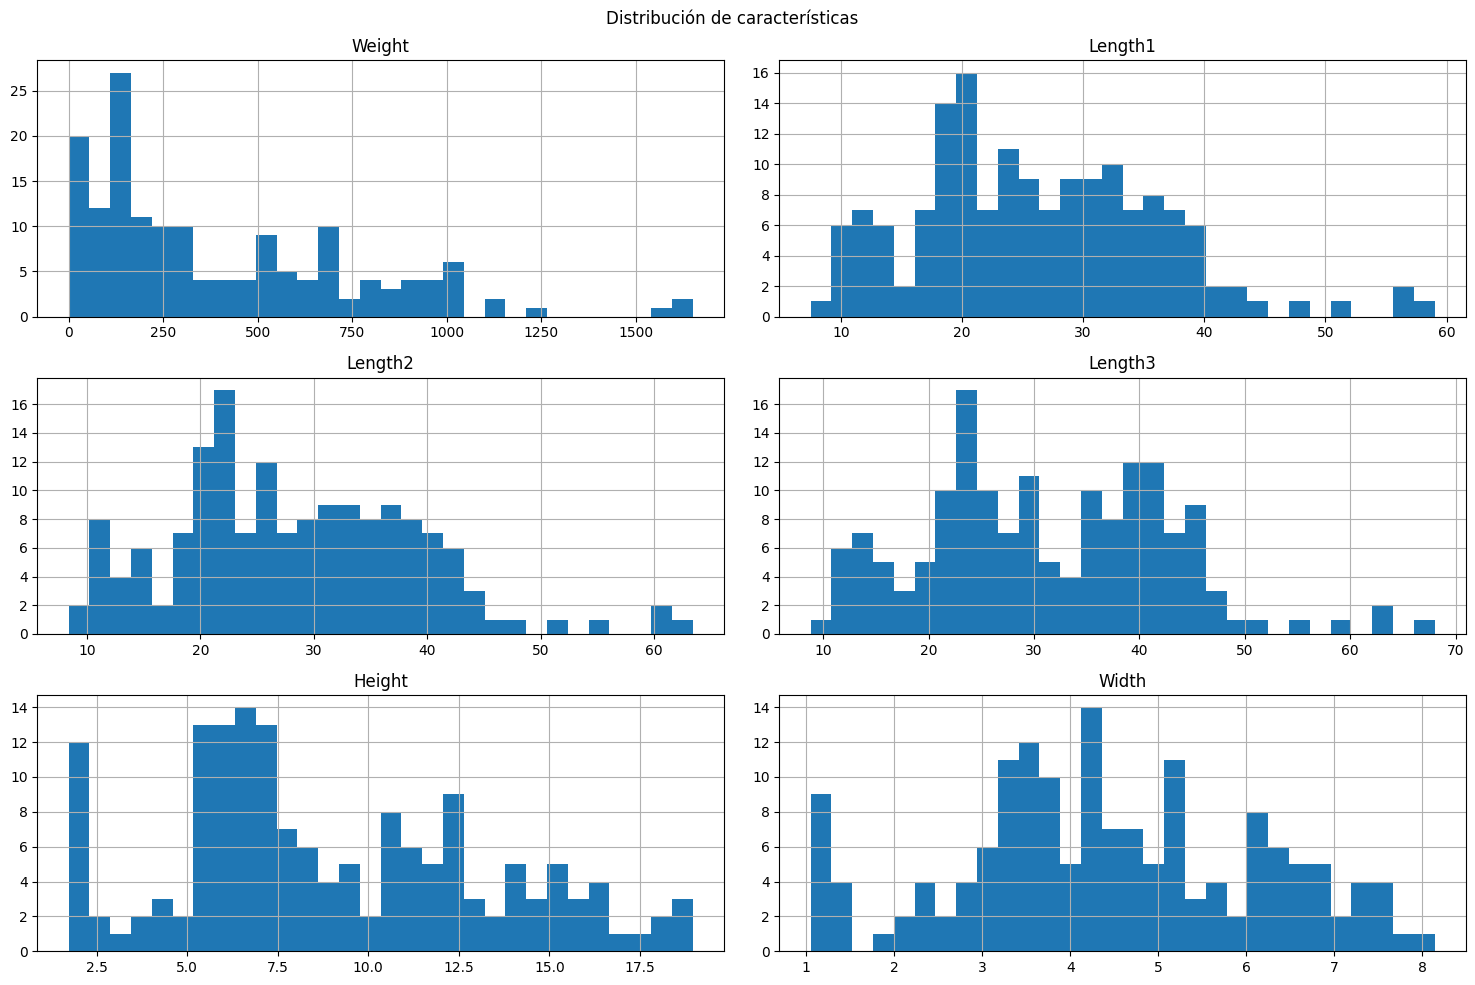


**** CORRELACIONES ****
Correlaciones respecto a Weight:
Weight     1.000000
Length3    0.923044
Length2    0.918618
Length1    0.915712
Width      0.886507
Height     0.724345
Name: Weight, dtype: float64


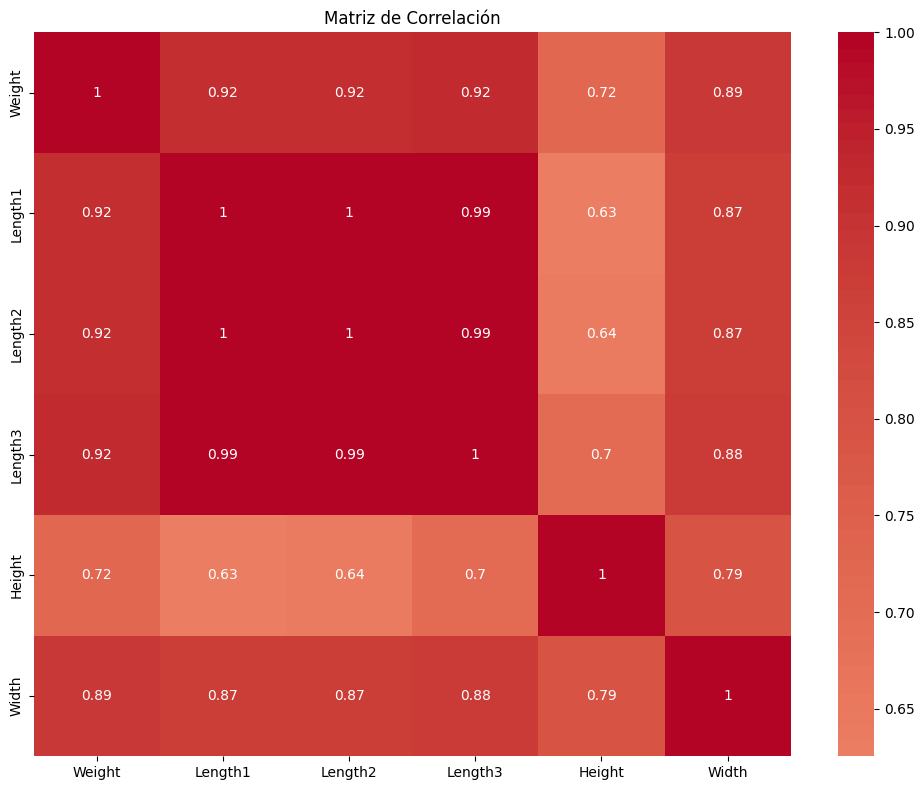

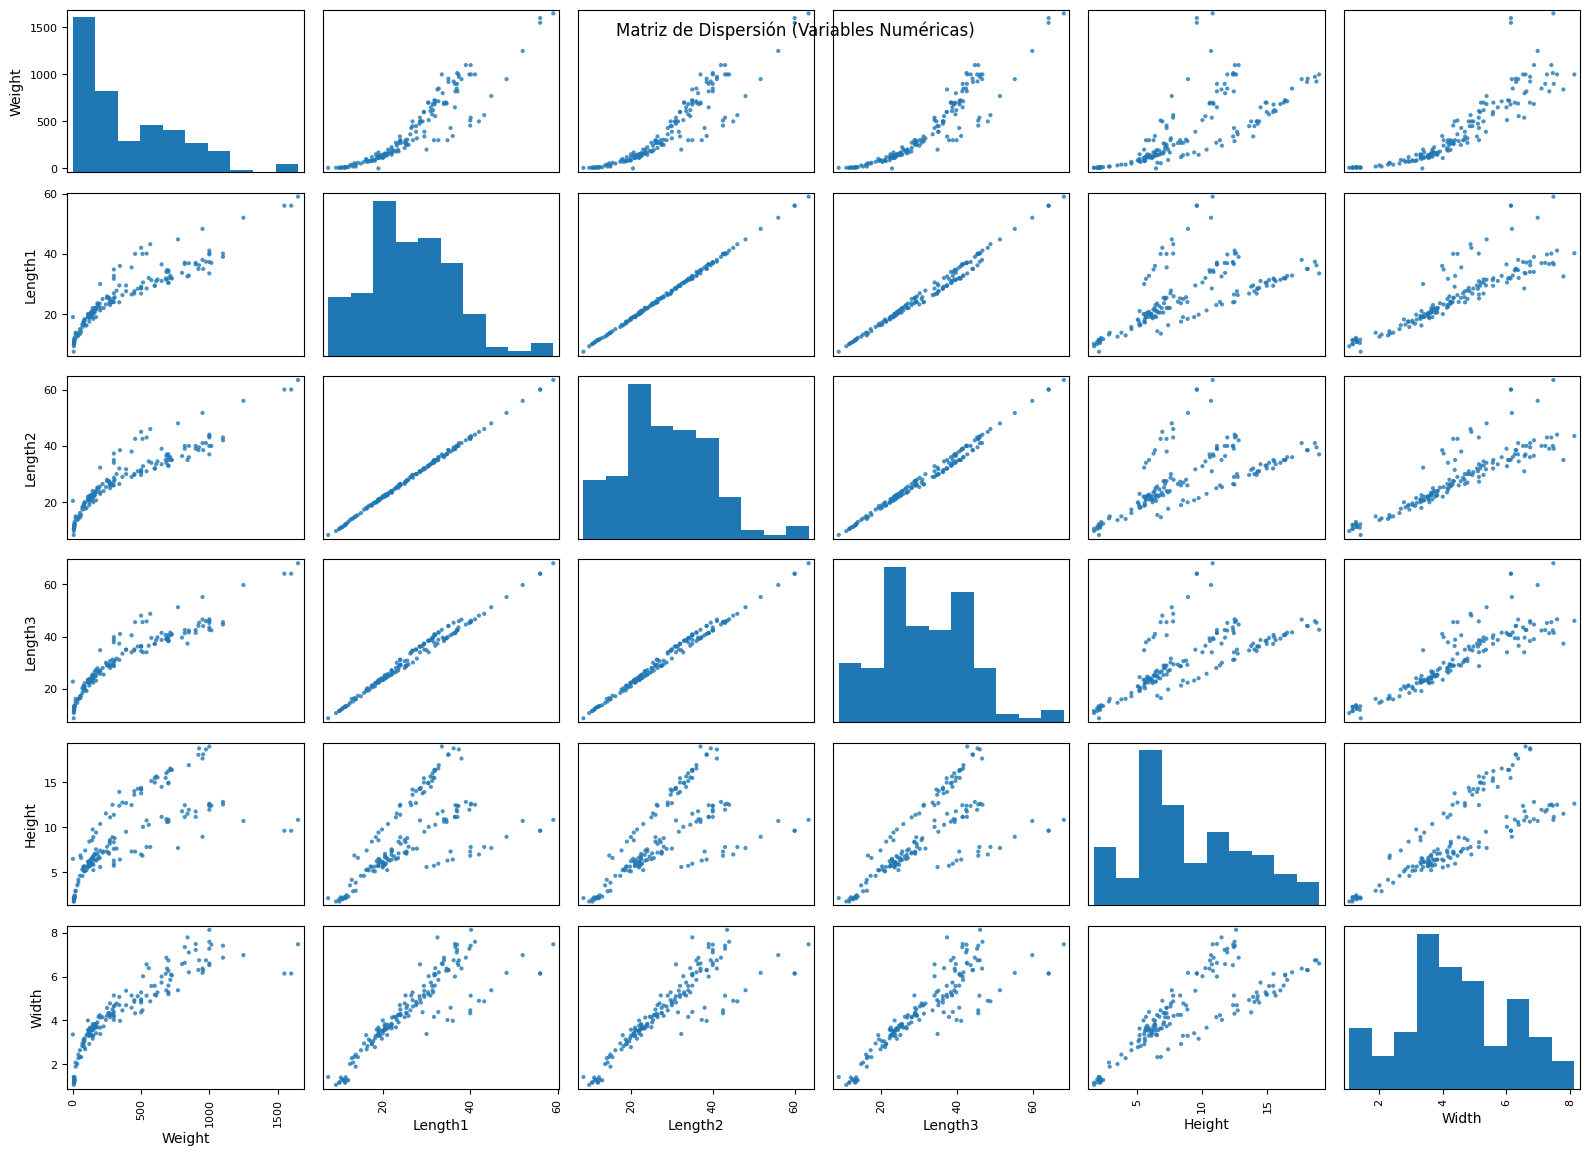


**** PREPARACIÓN DE DATOS ****
valores nulos por columna:
Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64
Tamaño conjunto entrenamiento: 127
Tamaño conjunto prueba: 32

**** CONSTRUCCIÓN DEL PIPELINE ****

**** ENTRENAMIENTO ****
1. entrenando regresión lineal
   RMSE regresión lineal: 117.43
   MAE regresión lineal: 77.03
2. entrenando árbol de decisión
   RMSE árbol de decisión: 98.71
   MAE árbol de decisión: 57.20
3. entrenando random forest
   RMSE random forest: 79.12
   MAE random forest: 46.60

**** CROSS VALIDATION ****
Regresión Lineal - CV (k=5):
  RMSE: [153.74375946  60.03363968  82.66871189 136.07128934  78.03270935]
  Media: 102.11
  Desviación estándar: 36.19

Árbol de Decisión - CV (k=5):
  RMSE: [ 97.61002668 100.0673062   66.16497563 109.06828137 112.81251349]
  Media: 97.14
  Desviación estándar: 16.47

Random Forest - CV (k=5):
  RMSE: [ 73.34351148  56.23895198  49.16528777 119.39752881  73.7767596 ]
  Media

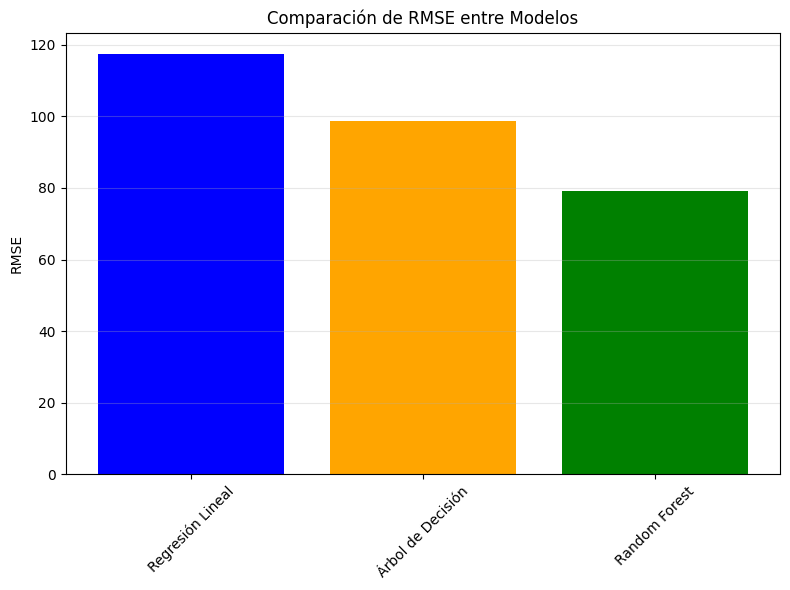


**** PREDICCIONES DE EJEMPLO ****
     Real  Predicho  Diferencia
0   850.0    773.18       76.82
1   200.0    186.87       13.13
2    12.2     10.51        1.69
3   556.0    653.99      -97.99
4   130.0    110.90       19.10
5   130.0    148.15      -18.15
6   390.0    407.12      -17.12
7  1600.0   1374.40      225.60
8    12.2     11.81        0.39
9   145.0    172.80      -27.80

**** ANÁLISIS FINAL ****
El mejor modelo es: Random Forest con RMSE = 79.12
Esto significa que en promedio, las predicciones del modelo
se desvían aproximadamente 79.12 gramos del peso real.

Comparación de todos los modelos:
  Regresión Lineal: RMSE = 117.43
  Árbol de Decisión: RMSE = 98.71
  Random Forest: RMSE = 79.12


In [5]:
# [ACLARACIÓN]:
# para este ejercicio se tomo el dataset Fish.csv que incluye información
# sobre peces de diferentes mercados y la idea es intentar predecir el
# peso de un pez en gramos basado en sus características. Debajo se encuentra
# la descripción del dataset tomado de la página:

# [Fish Market Dataset]
# This dataset includes data on the common fish species in fish market sales.
# Attributes include weight, length, height and width of fish used to predict
# fish weight based on these physical characteristics.
# [Dataset Source]: Fish Market Dataset
# [Labels]: Continuous values representing the weight of the fish (in grams).
# [Size]: 159 samples each with 7 attributes.
# [Data]: Numerical data

def load_fish_data():
    url = "https://media.geeksforgeeks.org/wp-content/uploads/20240522154350/Fish%5B1%5D.csv"
    return pd.read_csv(url)

# cargo datos y analizo algunas filas
fish = load_fish_data()
print("**** primeras filas del dataset: ****")
print(fish.head())
print("\n**** información del dataset: ****")
print(fish.info())
print("\n**** estadísticas descriptivas: ****")
print(fish.describe())

# características/features de los peces:
# Species (Especie)                -> única var categórica
# Weight  (Peso en gramos)         -> variable objetivo
# Length1
# Length2
# Length3
# Height  (Altura del pez)
# Width   (Ancho del pez)

# Length1, Length2 y Length3 son diferentes medidas del pez pero no se especifica cuales exactamente

# variable objetivo a predecir: Weight (peso del pez en gramos)

# [análisis de los datos y gráficos para explorar]
print("\n**** ANÁLISIS EXPLORATORIO ****")

# histogramas
fish.hist(bins=30, figsize=(15, 10))
plt.suptitle("Distribución de características")
plt.tight_layout()
plt.show()

# búsqueda de correlaciones
print("\n**** CORRELACIONES ****")

# matriz de correlación
corr_matrix = fish.corr(numeric_only=True)
print("Correlaciones respecto a Weight:")
print(corr_matrix["Weight"].sort_values(ascending=False))

# heatmap de correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Matriz de Correlación")
plt.tight_layout()
plt.show()

# matriz de dispersión para ver relaciones entre cada par de variables (solo las numéricas)
attributes = ["Weight", "Length1", "Length2", "Length3", "Height", "Width"]
scatter_matrix(fish[attributes], figsize=(16, 12), alpha=0.8)
plt.suptitle("Matriz de Dispersión (Variables Numéricas)", y=0.95)
plt.tight_layout()
plt.show()

# preparación de los datos
print("\n**** PREPARACIÓN DE DATOS ****")

# verificar que no haya valores nulos
print("valores nulos por columna:")
print(fish.isnull().sum()) # no hay datos null

# separo los datos para entrenamiento y validación (80%-20%):
# uso estratificación dividiendo en estratos por la
# característica 'Species' para evitar el sesgo por muestreo
# dado que no hay tantos datos (hay 159 en total)
strat_train_set, strat_test_set = train_test_split(
    fish, test_size=0.2, stratify=fish["Species"], random_state=42
)

print(f"Tamaño conjunto entrenamiento: {len(strat_train_set)}") # 80%
print(f"Tamaño conjunto prueba: {len(strat_test_set)}")         # 20%

# preparar características y variable objetivo:
# primero hay que excluir 'Weight' de las características
# ya que es la variable objetivo
X_train = strat_train_set.drop("Weight", axis=1)
y_train = strat_train_set["Weight"].copy()

X_test = strat_test_set.drop("Weight", axis=1)
y_test = strat_test_set["Weight"].copy()

# pipeline de preprocesamiento
print("\n**** CONSTRUCCIÓN DEL PIPELINE ****")

# definimos que características son numéricas y cuales categóricas
# no incluimos 'Weight' ya que es la var objetivo
num_attribs = ["Length1", "Length2", "Length3", "Height", "Width"]
cat_attribs = ["Species"]

# pipeline para las características numéricas:
# 'SimpleImputer' permite rellenar datos faltates con la media de la columna y
# aunque en este caso no faltan datos se deja como una medida de seguridad por
# si en el futuro se añaden mas datos o por cualquier otro motivo.
# Luego 'StandardScaler' sirve para normalizar los datos usando estandarización.
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('scaler', StandardScaler())
])

# pipeline para características categóricas:
# acá nuevamente usamos 'SimpleImputer' para rellenar datos faltantes y
# 'OneHotEncoder' para codificar las variables dandoles una
# representación binaria única a cada una.
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('onehot', OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

# combinamos los pipelines
preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

# entrenamiento y evaluación de varios modelos para comparar:
print("\n**** ENTRENAMIENTO ****")

# [Modelo 1]: regresión lineal
print("1. entrenando regresión lineal")
lin_reg = Pipeline([
    ('preprocessing', preprocessing),
    ('linear_regression', LinearRegression())
])

lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin)) # métrica RMSE
mae_lin = mean_absolute_error(y_test, y_pred_lin)          # métrica MAE

print(f"   RMSE regresión lineal: {rmse_lin:.2f}")
print(f"   MAE regresión lineal: {mae_lin:.2f}")

# [Modelo 2]: árbol de decisión (DT)
print("2. entrenando árbol de decisión")
tree_reg = Pipeline([
    ('preprocessing', preprocessing),
    ('decision_tree', DecisionTreeRegressor(random_state=42))
])

tree_reg.fit(X_train, y_train)
y_pred_tree = tree_reg.predict(X_test)

rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))
mae_tree = mean_absolute_error(y_test, y_pred_tree)

print(f"   RMSE árbol de decisión: {rmse_tree:.2f}")
print(f"   MAE árbol de decisión: {mae_tree:.2f}")

# [Modelo 3]: random forest
print("3. entrenando random forest")
forest_reg = Pipeline([
    ('preprocessing', preprocessing),
    ('random_forest', RandomForestRegressor(n_estimators=100, random_state=42))
])

forest_reg.fit(X_train, y_train)
y_pred_forest = forest_reg.predict(X_test)

rmse_forest = np.sqrt(mean_squared_error(y_test, y_pred_forest))
mae_forest = mean_absolute_error(y_test, y_pred_forest)

print(f"   RMSE random forest: {rmse_forest:.2f}")
print(f"   MAE random forest: {mae_forest:.2f}")

# cross-validation:
# dado que tenemos pocos datos (159) usar cross-validation es útil.
# usamos 5 folds (cv=5)
print("\n**** CROSS VALIDATION ****")

# cross-validation para regresión lineal
lin_scores = cross_val_score(lin_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
lin_rmse_scores = np.sqrt(-lin_scores)

print(f"Regresión Lineal - CV (k=5):")
print(f"  RMSE: {lin_rmse_scores}")
print(f"  Media: {lin_rmse_scores.mean():.2f}")
print(f"  Desviación estándar: {lin_rmse_scores.std():.2f}")

# cross-validation para árbol de decisión
tree_scores = cross_val_score(tree_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
tree_rmse_scores = np.sqrt(-tree_scores)

print(f"\nÁrbol de Decisión - CV (k=5):")
print(f"  RMSE: {tree_rmse_scores}")
print(f"  Media: {tree_rmse_scores.mean():.2f}")
print(f"  Desviación estándar: {tree_rmse_scores.std():.2f}")

# cross-validation para random forest
forest_scores = cross_val_score(forest_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
forest_rmse_scores = np.sqrt(-forest_scores)

print(f"\nRandom Forest - CV (k=5):")
print(f"  RMSE: {forest_rmse_scores}")
print(f"  Media: {forest_rmse_scores.mean():.2f}")
print(f"  Desviación estándar: {forest_rmse_scores.std():.2f}")

# comparación de los modelos
print("\n**** COMPARACIÓN DE MODELOS ****")
model_comparison = pd.DataFrame({
    'Modelo': ['Regresión Lineal', 'Árbol de Decisión', 'Random Forest'],
    'RMSE': [rmse_lin, rmse_tree, rmse_forest],
    'MAE': [mae_lin, mae_tree, mae_forest]
})
print(model_comparison)

# gráfico de comparación de modelos para el RMSE
plt.figure(figsize=(8, 6))
plt.bar(model_comparison['Modelo'], model_comparison['RMSE'], color=['blue', 'orange', 'green'])
plt.xticks(rotation=45)
plt.ylabel('RMSE')
plt.title('Comparación de RMSE entre Modelos')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# finamente algunas predicciones de ejemplo
print("\n**** PREDICCIONES DE EJEMPLO ****")
sample_predictions = pd.DataFrame({
    'Real': y_test.values[:10],
    'Predicho': y_pred_forest[:10].round(2),
    'Diferencia': (y_test.values[:10] - y_pred_forest[:10]).round(2)
})
print(sample_predictions)

print("\n**** ANÁLISIS FINAL ****")

# encontrar el mejor modelo basado en RMSE
modelos = {
    'Regresión Lineal': rmse_lin,
    'Árbol de Decisión': rmse_tree,
    'Random Forest': rmse_forest
}

mejor_modelo = min(modelos, key=modelos.get) # el que tenga menor error
mejor_rmse = modelos[mejor_modelo]

print(f"El mejor modelo es: {mejor_modelo} con RMSE = {mejor_rmse:.2f}")
print(f"Esto significa que en promedio, las predicciones del modelo")
print(f"se desvían aproximadamente {mejor_rmse:.2f} gramos del peso real.")

print("\nComparación de todos los modelos:")
for modelo, rmse in modelos.items():
    print(f"  {modelo}: RMSE = {rmse:.2f}")

# Práctica 3 - Ejercicio 6
---
### Agregue más estilos de cerveza, IPA (amarga pero no tan oscura), Scottish (ligeramente oscura pero no tan amarga).
* ### a) Genere un dataset sintético con valores acordes para ellos.
* ### b) Utilice la biblioteca ScikitLearn para generar clasificadores, para cada una de ellas. Luego realice clasificación para cada estilo.
* ### c) Utilice las técnicas OVR y OVO para clasificación multiclase
* ### d) Utilice la técnica softmax para “multi_class = ‘multinomial’” para entrenar el modelo multiclase.
* ### e) Evalúe los modelos aprendidos y reentrene con diferentes hiperámetros. En todos los casos grafique la matriz de confusión para interpretar gráficamente los resultados.


=== One-vs-Rest (OvR) ===
              precision    recall  f1-score   support

         IPA       1.00      1.00      1.00        10
    Scottish       1.00      0.89      0.94         9
       Stout       1.00      1.00      1.00         9
       Lager       0.89      1.00      0.94         8

    accuracy                           0.97        36
   macro avg       0.97      0.97      0.97        36
weighted avg       0.98      0.97      0.97        36



C:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


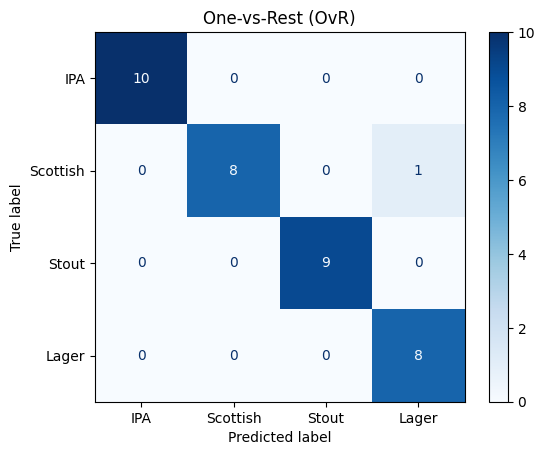


=== One-vs-One (OvO) ===
              precision    recall  f1-score   support

         IPA       1.00      1.00      1.00        10
    Scottish       1.00      1.00      1.00         9
       Stout       1.00      1.00      1.00         9
       Lager       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



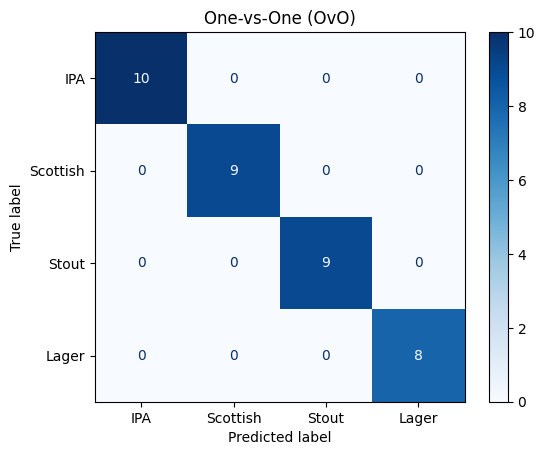


=== Softmax (Multinomial) ===
              precision    recall  f1-score   support

         IPA       1.00      1.00      1.00        10
    Scottish       1.00      1.00      1.00         9
       Stout       1.00      1.00      1.00         9
       Lager       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



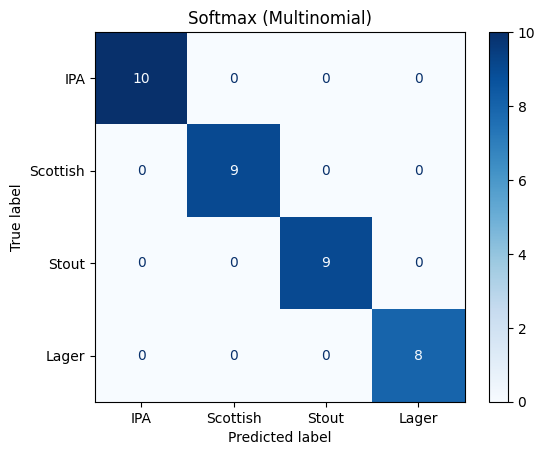

In [6]:
# ============================================================
# a) Generación del dataset sintético
# ============================================================
def generar_dataset_cervezas(n_por_tipo=20, random_state=None):
    """
    Genera un dataset sintético con 4 estilos de cerveza, cada uno definido
    por un rango típico de 'amargor' y 'color'.

    Parámetros:
        n_por_tipo (int): número de muestras por tipo de cerveza.
        random_state (int | None): semilla para reproducibilidad.

    Retorna:
        X (np.ndarray): características (amargor, color)
        y (np.ndarray): etiquetas numéricas (0, 1, 2, 3)
        labels (np.ndarray[str]): nombres de las clases
    """
    if random_state is not None:
        np.random.seed(random_state)

    # Rango de valores sintéticos para cada tipo
    # (amargor, color)
    rangos = {
        "IPA":      ((5, 10), (35, 55)),  # amarga, color medio
        "Scottish": ((9, 17), (15, 30)),  # oscura ligera, poco amarga
        "Stout":    ((28, 40), (30, 50)), # muy oscura y amarga
        "Lager":    ((2, 7), (8, 25))     # clara y poco amarga
    }

    X, y = [], []
    labels = list(rangos.keys())

    for i, tipo in enumerate(labels):
        rango_amargor, rango_color = rangos[tipo]
        # Generamos valores uniformes dentro de los rangos
        datos_tipo = np.column_stack((
            np.random.uniform(*rango_amargor, size=n_por_tipo),
            np.random.uniform(*rango_color, size=n_por_tipo)
        ))
        X.append(datos_tipo)
        y.append(np.full(n_por_tipo, i))

    # Unificamos los datos de todos los estilos
    X = np.vstack(X)
    y = np.concatenate(y)
    return X, y, np.array(labels)

# ============================================================
# Generación y división de datos
# ============================================================
X, y, labels = generar_dataset_cervezas(n_por_tipo=30, random_state=42)

# División: 70% entrenamiento, 30% validación
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, shuffle=True, random_state=42
)

# ============================================================
# b) Escalado de características
# ============================================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# ============================================================
# c) Modelos multiclase: OvR, OvO, Softmax
# ============================================================
base_clf = LogisticRegression(max_iter=500, random_state=42)

# One-vs-Rest
ovr_clf = OneVsRestClassifier(base_clf).fit(X_train_scaled, y_train)

# One-vs-One
ovo_clf = OneVsOneClassifier(base_clf).fit(X_train_scaled, y_train)

# Softmax (multinomial)
softmax_clf = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=500,
    random_state=42
).fit(X_train_scaled, y_train)

# ============================================================
# d) Predicciones
# ============================================================
y_pred_ovr = ovr_clf.predict(X_val_scaled)
y_pred_ovo = ovo_clf.predict(X_val_scaled)
y_pred_soft = softmax_clf.predict(X_val_scaled)

# ============================================================
# e) Evaluación: matrices de confusión y métricas
# ============================================================
def evaluar_modelo(y_true, y_pred, labels, nombre_modelo):
    print(f"\n=== {nombre_modelo} ===")
    print(classification_report(y_true, y_pred, target_names=labels))
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=labels)
    disp.plot(cmap='Blues')
    plt.title(nombre_modelo)
    plt.show()

# Evaluación de cada modelo
evaluar_modelo(y_val, y_pred_ovr, labels, "One-vs-Rest (OvR)")
evaluar_modelo(y_val, y_pred_ovo, labels, "One-vs-One (OvO)")
evaluar_modelo(y_val, y_pred_soft, labels, "Softmax (Multinomial)")

# Práctica 4 - Ejercicio 7
---
### Retome el dataset “ruidoso” del ejercicio y compare entrenando un modelo con DT y luego aplicando bagging, particularmente, Random Forest. Analice los resultados con matrices de confusión.

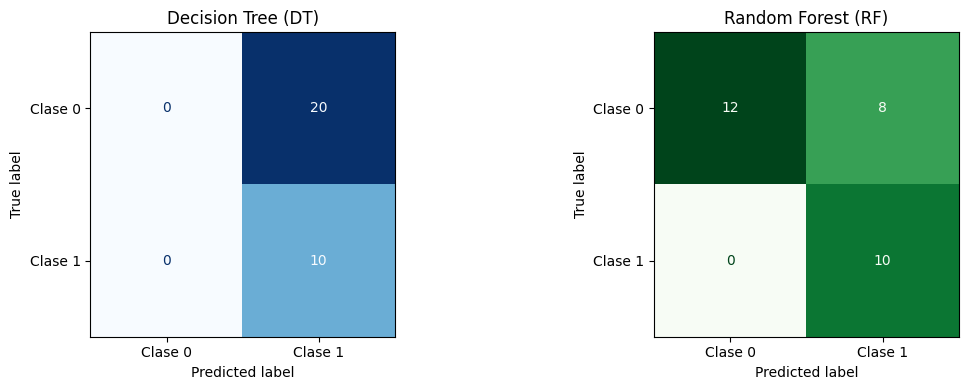

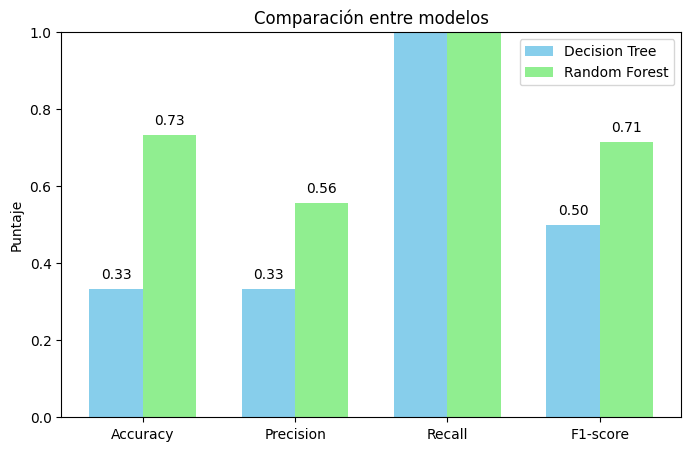

In [7]:
# Datos
X, y = make_moons(n_samples=100, noise=0.35, random_state=42)
labels = ["Clase 0", "Clase 1"]

# División entre entrenamiento y evaluación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenamiento del decision tree
dt = DecisionTreeClassifier(criterion="gini", ccp_alpha=0.3, random_state=42)
dt.fit(X_train, y_train)

# Entrenamiento del random forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predicciones
y_dt_pred = dt.predict(X_val)
y_rf_pred = rf.predict(X_val)

# Matrices de confusión
cm_dt = confusion_matrix(y_val, y_dt_pred)
cm_rf = confusion_matrix(y_val, y_rf_pred)

# Gráficos de matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

ConfusionMatrixDisplay(cm_dt, display_labels=labels).plot(ax=axes[0], cmap='Blues', colorbar=False)
axes[0].set_title("Decision Tree (DT)")

ConfusionMatrixDisplay(cm_rf, display_labels=labels).plot(ax=axes[1], cmap='Greens', colorbar=False)
axes[1].set_title("Random Forest (RF)")

plt.tight_layout()
plt.show()

# Métricas
metrics = ["Accuracy", "Precision", "Recall", "F1-score"]
dt_scores = [
    accuracy_score(y_val, y_dt_pred),
    precision_score(y_val, y_dt_pred),
    recall_score(y_val, y_dt_pred),
    f1_score(y_val, y_dt_pred)
]
rf_scores = [
    accuracy_score(y_val, y_rf_pred),
    precision_score(y_val, y_rf_pred),
    recall_score(y_val, y_rf_pred),
    f1_score(y_val, y_rf_pred)
]

# Gráfico de métricas
x = np.arange(len(metrics))
width = 0.35
fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, dt_scores, width, label="Decision Tree", color="skyblue")
bars2 = ax.bar(x + width/2, rf_scores, width, label="Random Forest", color="lightgreen")

ax.set_ylabel("Puntaje")
ax.set_title("Comparación entre modelos")
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
ax.set_ylim(0, 1)

for bars in [bars1, bars2]:
    for bar in bars:
        yval = bar.get_height()
        if yval != 1.0:
            ax.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f"{yval:.2f}", ha='center', va='bottom')

plt.show()

# Práctica 4 - Ejercicio 9
---
### Construya un modelo utilizando Stacking para el dataset Iris. Utilice como modelos base DT,KNN y LogisticRegresion. Pruebe con distintos meta-modelos para analizar las mejoras.

Modelos base individuales:
DecisionTreeClassifier - Precisión: 0.9333
KNeighborsClassifier - Precisión: 0.9778
LogisticRegression - Precisión: 0.9333

Stacking con diferentes meta-modelos:
Meta-modelo: LogisticRegression - Precisión: 0.9556
Meta-modelo: DecisionTreeClassifier - Precisión: 0.8889
Meta-modelo: KNeighborsClassifier - Precisión: 0.9333


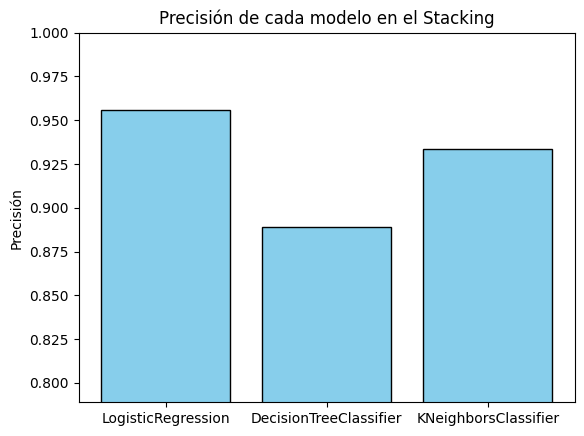

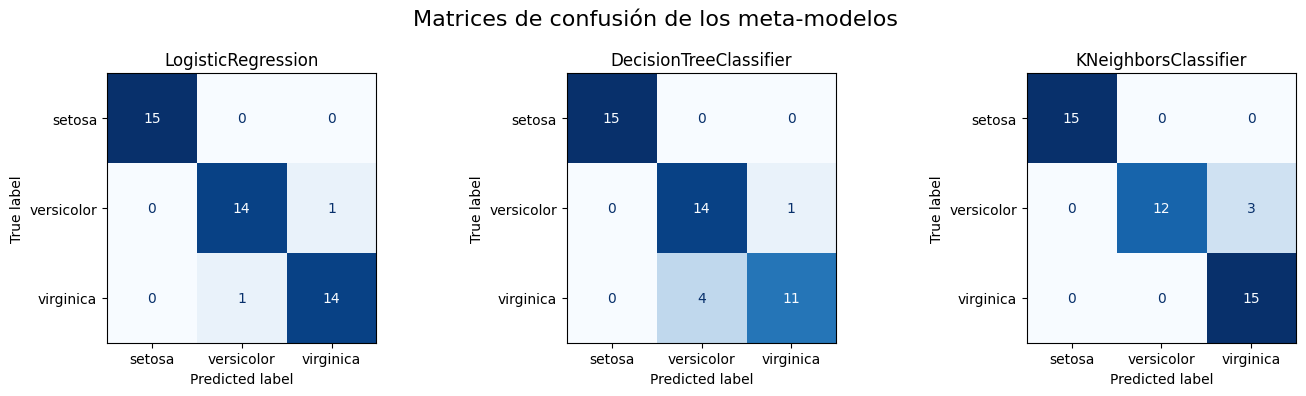

In [8]:
# Cargar el dataset Iris
# X contiene las 4 características de cada flor (longitud y ancho de sépalo y pétalo)
# y contiene las etiquetas de clase (0, 1 o 2) correspondientes a las especies de Iris
iris = load_iris()
X, y = iris.data, iris.target

# Dividir en conjunto de entrenamiento y prueba (70% - 30%)
# stratify=y asegura que cada conjunto mantenga la proporción de clases original
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Definir los modelos base del stacking:
# - Decision Tree: modelo de árbol de decisión
# - KNN: clasificador basado en vecinos más cercanos
# - Logistic Regression: modelo para clasificación
base_models = [
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('knn', KNeighborsClassifier()),
    ('lr', LogisticRegression(max_iter=200))
]

# Lista de meta-modelos para probar
meta_models = [
    LogisticRegression(max_iter=200),
    DecisionTreeClassifier(random_state=42),
    KNeighborsClassifier()
]

# Evaluar modelos base individuales (sin stacking)
print("Modelos base individuales:")
for name, model in base_models:

    model.fit(X_train, y_train) # Entrenar con los datos de entrenamiento

    y_pred = model.predict(X_test) # Predecir las clases del conjunto de prueba

    acc = accuracy_score(y_test, y_pred) # Calcular precisión del modelo

    print(f"{model.__class__.__name__} - Precisión: {acc:.4f}") # Mostrar el modelo utilizado y su precisión

# Evaluar stacking con distintos meta-modelos
print("\nStacking con diferentes meta-modelos:")

precisiones = [] # Lista para guardar la precisión de cada meta-modelo

cms = [] # Lista para guardar las matrices de confusión

for meta in meta_models:

    stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta) # Combinar modelos base

    stacking_model.fit(X_train, y_train) # Entrenar con los datos de entrenamiento

    y_pred = stacking_model.predict(X_test) # Predecir las clases del conjunto de prueba

    acc = accuracy_score(y_test, y_pred) # Calcular precisión del modelo

    precisiones.append(acc) # Guardar la precisión del meta-modelo

    cms.append(confusion_matrix(y_test, y_pred)) # Guardar la matriz de confusión del meta-modelo

    print(f"Meta-modelo: {meta.__class__.__name__} - Precisión: {acc:.4f}") # Mostrar el meta-modelo utilizado y su precisión

# Gráfico de barras para comparar la precisión de los meta-modelos
plt.bar([m.__class__.__name__ for m in meta_models], precisiones, color='skyblue', edgecolor='black')
plt.title("Precisión de cada modelo en el Stacking")
plt.ylabel("Precisión")
plt.ylim(min(precisiones) - 0.1, 1.0)
plt.show()

# Mostrar en paralelo las matrices de confusión de los meta-modelos para comparar resultados
fig, axes = plt.subplots(1, len(meta_models), figsize=(14, 4))
fig.suptitle("Matrices de confusión de los meta-modelos", fontsize=16)
for i, (meta, cm) in enumerate(zip(meta_models, cms)):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names) # Crear la matriz que compara las clases reales (y_test) con las predichas (y_pred)

    # Graficar matriz de confusión
    disp.plot(ax=axes[i], cmap='Blues', colorbar=False)
    axes[i].set_title(meta.__class__.__name__)

plt.tight_layout()
plt.show()

## Conclusión

El stacking con distintos meta-modelos evidenció que la Regresión Logística obtuvo la mayor precisión (0.9556), combinando eficazmente las predicciones de los modelos base; el KNN alcanzó un valor intermedio (0.9333) y el Árbol de Decisión presentó la menor precisión (0.8889), por lo que la Regresión Logística se destaca como el meta-modelo más adecuado para este conjunto de datos.

# Práctica 5 - Ejercicio 3
---
### Entrenar un MLP con el dataset Iris, y comparar los resultados obtenidos con los métodos de clasificación ya vistos SVM y Decision Tree.

Modelo: MLP - Precisión: 0.9778
Modelo: SVM - Precisión: 0.9556
Modelo: Decision Tree - Precisión: 0.9333


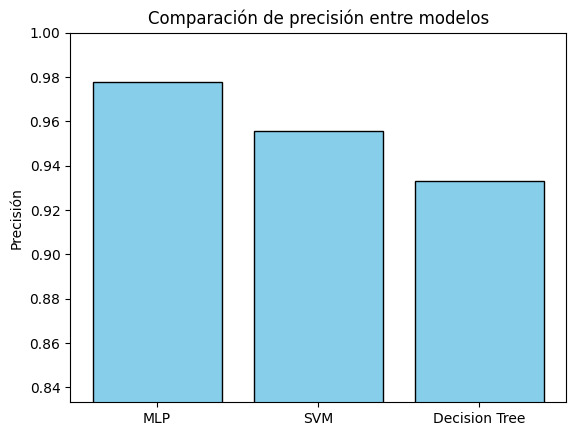

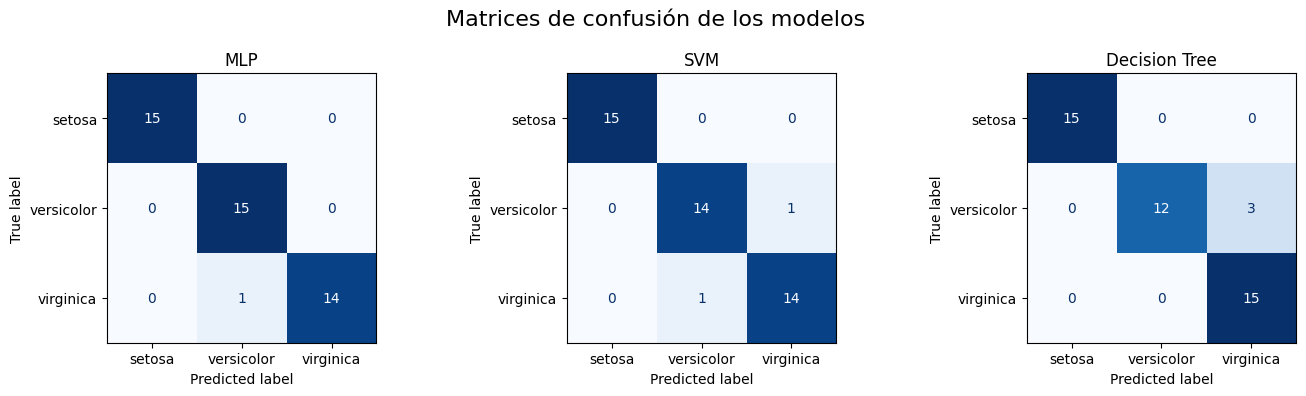

In [9]:
# Cargar dataset Iris
# X contiene las 4 características de cada flor (longitud y ancho de sépalo y pétalo)
# y contiene las etiquetas de clase (0, 1 o 2) correspondientes a las especies de Iris
iris = load_iris()
X, y = iris.data, iris.target

# Dividir en conjunto de entrenamiento y prueba (70% - 30%)
# stratify=y asegura que cada conjunto mantenga la proporción de clases original
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Definir los modelos a comparar
mlp_model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=10000, random_state=42) # Red neuronal con 1 capa oculta de 10 neuronas
svm_model = SVC(kernel='rbf', random_state=42) # SVM con kernel RBF
dt_model = DecisionTreeClassifier(random_state=42) # Árbol de decisión

# Lista de modelos con nombre para iterar
models = [
    ('MLP', mlp_model),
    ('SVM', svm_model),
    ('Decision Tree', dt_model)
]

# Entrenar cada modelo y calcular precisión

precisiones = [] # Lista para guardar la precisión de cada modelo

cms = [] # Lista para guardar las matrices de confusión

for name, model in models:

    model.fit(X_train, y_train) # Entrenar con los datos de entrenamiento

    y_pred = model.predict(X_test) # Predecir las clases del conjunto de prueba

    acc = accuracy_score(y_test, y_pred) # Calcular precisión del modelo

    precisiones.append(acc) # Guardar la precisión del modelo

    cms.append(confusion_matrix(y_test, y_pred)) # Guardar la matriz de confusión del modelo

    print(f"Modelo: {name} - Precisión: {acc:.4f}") # Mostrar el modelo utilizado y su precisión

# Gráfico de barras para comparar la precisión de los meta-modelos
plt.bar([name for name, _ in models], precisiones, color='skyblue', edgecolor='black')
plt.title("Comparación de precisión entre modelos")
plt.ylabel("Precisión")
plt.ylim(min(precisiones) - 0.1, 1.0)
plt.show()

# Mostrar en paralelo las matrices de confusión de los modelos para comparar resultados
fig, axes = plt.subplots(1, len(models), figsize=(14, 4))
fig.suptitle("Matrices de confusión de los modelos", fontsize=16)
for i, ((name, _), cm) in enumerate(zip(models, cms)):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names) # Crear la matriz que compara las clases reales (y_test) con las predichas (y_pred)

    # Graficar matriz de confusión
    disp.plot(ax=axes[i], cmap='Blues', colorbar=False)
    axes[i].set_title(name)


plt.tight_layout()
plt.show()

## Conclusión

El análisis de los modelos de clasificación mostró que el MLP obtuvo la mayor precisión (0.9778), seguido por el SVM (0.9556) y el Árbol de Decisión (0.9333), indicando que el MLP se destacó como el modelo más adecuado para este conjunto de datos.

# Práctica 6 - Ejercicio 3 (Iris)
---
### Implementar una CNN para el modelo Iris, probar con diferentes configuraciones, capas convolucionales, capas densas. Registre y compare las métricas. Contraste los resultados con modelos previos entrenados.

En esta versión de este ejercicio se usa el siguiente [dataset](https://www.kaggle.com/datasets/jeffheaton/iris-computer-vision). Es importante destacar que este dataset está desbalanceado, ya que contiene muchas imágenes de la flor versicolor, y pocas de las demás flores (setosa, virginica). Se decidió continuar con este ejercicio para mostrar los efectos de un dataset desbalanceado en el entrenamiento de un modelo CNN y se creó otra versión usando un dataset distinto y más completo (CIFAR10).

<h3>Carga de datos y división en conjuntos de entrenamiento y validación</h3>

In [10]:

# dataset Iris
IMG_SIZE = (256, 256)
BATCH_SIZE = 8

train_ds = tf.keras.utils.image_dataset_from_directory(
    "./iris",
    validation_split=0.2,  # 20% para validación
    subset="training",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

valid_ds = tf.keras.utils.image_dataset_from_directory(
    "./iris",
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)


Found 423 files belonging to 3 classes.
Using 339 files for training.
Found 423 files belonging to 3 classes.
Using 84 files for validation.


<h3>Modificaciones de pesos de clases</h3>
<p>Para intentar reducir los efectos del desbalance en los datos, se usa compute_class_weight, que calcula y devuelve pesos teniendo en cuenta el número de ejemplos por clase. Estos pesos penalizan a la clase dominante en los datos y ayudan a aquellas que no tienen muchos ejemplos. Se pasan al modelo antes de comenzar el entrenamiento.</p>

In [11]:
# Como se tienen muchos mas ejemplos de la flor iris versicolor, modifico los pesos para intentar balancearlos y buscar permitir el correcto aprendizaje de todas las clases.
class_names = train_ds.class_names
labels = np.concatenate([y for x, y in train_ds], axis=0)
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(labels),
    y=labels
)
class_weights = dict(enumerate(class_weights))
print("Pesos por clase:", class_weights)

Pesos por clase: {0: 2.1320754716981134, 1: 0.5159817351598174, 2: 1.6865671641791045}


<h3>Construcción del modelo y entrenamiento</h3>

In [12]:
# Early stopping para evitar el sobreentrenamiento
callback = EarlyStopping(
    patience=5, restore_best_weights=True
)

# Capas para data augmentation, al tener pocos datos
data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.1),
    RandomZoom(0.1),
    RandomContrast(0.1),
])

model = Sequential([
    data_augmentation,
    Rescaling(1./255, input_shape=(256, 256, 3)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(4,4),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])
model.compile(optimizer=Adam(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_ds, epochs=30, batch_size=BATCH_SIZE, verbose=1, validation_data=valid_ds, class_weight=class_weights, callbacks=callback)
loss, acc = model.evaluate(valid_ds)
print(f"Accuracy: {acc:.2f}")
model.summary()



Epoch 1/30


43/43 [==============================] - 12s 163ms/step - loss: 1.1016 - accuracy: 0.2714 - val_loss: 1.1012 - val_accuracy: 0.1905
Epoch 2/30
43/43 [==============================] - 6s 142ms/step - loss: 1.1032 - accuracy: 0.2035 - val_loss: 1.1045 - val_accuracy: 0.1905
Epoch 3/30
43/43 [==============================] - 6s 146ms/step - loss: 1.1018 - accuracy: 0.2183 - val_loss: 1.1015 - val_accuracy: 0.2500
Epoch 4/30
43/43 [==============================] - 7s 150ms/step - loss: 1.0957 - accuracy: 0.3510 - val_loss: 1.0893 - val_accuracy: 0.4286
Epoch 5/30
43/43 [==============================] - 7s 154ms/step - loss: 1.0940 - accuracy: 0.3864 - val_loss: 1.0948 - val_accuracy: 0.4167
Epoch 6/30
43/43 [==============================] - 6s 145ms/step - loss: 1.0894 - accuracy: 0.3274 - val_loss: 1.0748 - val_accuracy: 0.5833
Epoch 7/30
43/43 [==============================] - 6s 145ms/step - loss: 1.0844 - accuracy: 0.4395 - val_loss: 1.0768 - val_accuracy: 0.5238
E

In [13]:
# Predicciones y estadísticas
y_pred = model.predict(valid_ds)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.concatenate([y for x, y in valid_ds], axis=0)
print(classification_report(y_true, y_pred_classes))

11/11 [==============================] - 0s 29ms/step
              precision    recall  f1-score   support

           0       0.15      0.12      0.14        16
           1       0.52      0.46      0.49        50
           2       0.15      0.22      0.18        18

    accuracy                           0.35        84
   macro avg       0.27      0.27      0.27        84
weighted avg       0.37      0.35      0.36        84



<p>Estas estadísticas finales muestran que el modelo está sesgado y predice en su mayoría la clase 1 (versicolor) para entradas que no lo son. Las otras dos clases (setosa, virginica) son casi ignoradas por el modelo.</p>

# Práctica 6 - Ejercicio 3 (CIFAR10)
---
En esta versión de este ejercicio se usa el siguiente [dataset](https://www.cs.toronto.edu/~kriz/cifar.html).

<h3>Carga de datos</h3>

In [14]:
# dataset CIFAR10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

<h3>Construcción del modelo y entrenamiento</h3>

In [15]:
callback = EarlyStopping(
    patience=5, restore_best_weights=True
)

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (2,2), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=x_train, y=y_train, epochs=30, batch_size=16, verbose=1, validation_split=0.1, callbacks=callback)
loss, acc = model.evaluate(x_test, y_test)
print(f"Accuracy: {acc:.2f}")
model.summary()

Epoch 1/30
2813/2813 [==============================] - 24s 8ms/step - loss: 1.8172 - accuracy: 0.3388 - val_loss: 1.5326 - val_accuracy: 0.4554
Epoch 2/30
2813/2813 [==============================] - 23s 8ms/step - loss: 1.5269 - accuracy: 0.4487 - val_loss: 1.3862 - val_accuracy: 0.5112
Epoch 3/30
2813/2813 [==============================] - 23s 8ms/step - loss: 1.4091 - accuracy: 0.4955 - val_loss: 1.2809 - val_accuracy: 0.5522
Epoch 4/30
2813/2813 [==============================] - 24s 9ms/step - loss: 1.3340 - accuracy: 0.5256 - val_loss: 1.2174 - val_accuracy: 0.5748
Epoch 5/30
2813/2813 [==============================] - 24s 8ms/step - loss: 1.2722 - accuracy: 0.5480 - val_loss: 1.1686 - val_accuracy: 0.6004
Epoch 6/30
2813/2813 [==============================] - 24s 9ms/step - loss: 1.2229 - accuracy: 0.5682 - val_loss: 1.1176 - val_accuracy: 0.6104
Epoch 7/30
2813/2813 [==============================] - 24s 9ms/step - loss: 1.1789 - accuracy: 0.5798 - val_loss: 1.0929 - val_ac

In [16]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.concatenate([y for y in y_test], axis=0)
print(classification_report(y_true, y_pred_classes))

313/313 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.74      0.73      0.73      1000
           1       0.82      0.79      0.80      1000
           2       0.60      0.59      0.59      1000
           3       0.56      0.50      0.53      1000
           4       0.64      0.66      0.65      1000
           5       0.60      0.63      0.61      1000
           6       0.84      0.71      0.77      1000
           7       0.75      0.76      0.75      1000
           8       0.73      0.85      0.78      1000
           9       0.74      0.79      0.76      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



# Práctica 7 - Ejercicio 4
---
### Modifique la implementación para implementar GRU (Gated Recurrent), luego correr experimentos para evaluar diferencias respecto de la implementación anterior.

###En esta sección se muestra una implementación de una red RNN vanilla y luego su modificación para la implementación de GRU. Ambas se entrenarán con un archivo que contiene código como experimento para analizar las diferencias en el progreso durante el entrenamiento.

In [17]:
"""
Minimal character-level Vanilla RNN model. Written by Andrej Karpathy (@karpathy)
BSD License
"""
import numpy as np

# data I/O
data = open('linux_input.txt', 'r', encoding='latin-1').read() # should be simple plain text file
chars = list(set(data))
data_size, vocab_size = len(data), len(chars)
print('data has %d characters, %d unique.' % (data_size, vocab_size))
char_to_ix = { ch:i for i,ch in enumerate(chars) }
ix_to_char = { i:ch for i,ch in enumerate(chars) }
losses_rnn = []

# hyperparameters
hidden_size = 120 # size of hidden layer of neurons
seq_length = 60 # number of steps to unroll the RNN for
learning_rate = 1e-2

# model parameters
Wxh = np.random.randn(hidden_size, vocab_size)*0.01 # input to hidden
Whh = np.random.randn(hidden_size, hidden_size)*0.01 # hidden to hidden
Why = np.random.randn(vocab_size, hidden_size)*0.01 # hidden to output
bh = np.zeros((hidden_size, 1)) # hidden bias
by = np.zeros((vocab_size, 1)) # output bias

def lossFun(inputs, targets, hprev):
  """
  inputs,targets are both list of integers.
  hprev is Hx1 array of initial hidden state
  returns the loss, gradients on model parameters, and last hidden state
  """
  xs, hs, ys, ps = {}, {}, {}, {}
  hs[-1] = np.copy(hprev)
  loss = 0
  # forward pass
  for t in range(len(inputs)):
    xs[t] = np.zeros((vocab_size,1)) # encode in 1-of-k representation
    xs[t][inputs[t]] = 1
    hs[t] = np.tanh(np.dot(Wxh, xs[t]) + np.dot(Whh, hs[t-1]) + bh) # hidden state
    ys[t] = np.dot(Why, hs[t]) + by # unnormalized log probabilities for next chars
    ps[t] = np.exp(ys[t]) / np.sum(np.exp(ys[t])) # probabilities for next chars
    loss += -np.log(ps[t][targets[t],0]) # softmax (cross-entropy loss)
  # backward pass: compute gradients going backwards
  dWxh, dWhh, dWhy = np.zeros_like(Wxh), np.zeros_like(Whh), np.zeros_like(Why)
  dbh, dby = np.zeros_like(bh), np.zeros_like(by)
  dhnext = np.zeros_like(hs[0])
  for t in reversed(range(len(inputs))):
    dy = np.copy(ps[t])
    dy[targets[t]] -= 1 # backprop into y. see http://cs231n.github.io/neural-networks-case-study/#grad if confused here
    dWhy += np.dot(dy, hs[t].T)
    dby += dy
    dh = np.dot(Why.T, dy) + dhnext # backprop into h
    dhraw = (1 - hs[t] * hs[t]) * dh # backprop through tanh nonlinearity
    dbh += dhraw
    dWxh += np.dot(dhraw, xs[t].T)
    dWhh += np.dot(dhraw, hs[t-1].T)
    dhnext = np.dot(Whh.T, dhraw)
  for dparam in [dWxh, dWhh, dWhy, dbh, dby]:
    np.clip(dparam, -5, 5, out=dparam) # clip to mitigate exploding gradients
  return loss, dWxh, dWhh, dWhy, dbh, dby, hs[len(inputs)-1]

def sample(h, seed_ix, n):
  """
  sample a sequence of integers from the model
  h is memory state, seed_ix is seed letter for first time step
  """
  x = np.zeros((vocab_size, 1))
  x[seed_ix] = 1
  ixes = []
  for t in range(n):
    h = np.tanh(np.dot(Wxh, x) + np.dot(Whh, h) + bh)
    y = np.dot(Why, h) + by
    p = np.exp(y) / np.sum(np.exp(y))
    ix = np.random.choice(range(vocab_size), p=p.ravel())
    x = np.zeros((vocab_size, 1))
    x[ix] = 1
    ixes.append(ix)
  return ixes

n, p = 0, 0
mWxh, mWhh, mWhy = np.zeros_like(Wxh), np.zeros_like(Whh), np.zeros_like(Why)
mbh, mby = np.zeros_like(bh), np.zeros_like(by) # memory variables for Adagrad
smooth_loss = -np.log(1.0/vocab_size)*seq_length # loss at iteration 0
losses_rnn.append(smooth_loss)
while (n < 20000):
  # prepare inputs (we're sweeping from left to right in steps seq_length long)
  if p+seq_length+1 >= len(data) or n == 0:
    hprev = np.zeros((hidden_size,1)) # reset RNN memory
    p = 0 # go from start of data
  inputs = [char_to_ix[ch] for ch in data[p:p+seq_length]]
  targets = [char_to_ix[ch] for ch in data[p+1:p+seq_length+1]]

  # sample from the model now and then
  if n % 1000 == 0:
    sample_ix = sample(hprev, inputs[0], 200)
    txt = ''.join(ix_to_char[ix] for ix in sample_ix)
    print('----\n %s \n----' % (txt, ))

  # forward seq_length characters through the net and fetch gradient
  loss, dWxh, dWhh, dWhy, dbh, dby, hprev = lossFun(inputs, targets, hprev)
  smooth_loss = smooth_loss * 0.999 + loss * 0.001
  losses_rnn.append(smooth_loss)
  if n % 1000 == 0: print('iter %d, loss: %f' % (n, smooth_loss)) # print progress

  # perform parameter update with Adagrad
  for param, dparam, mem in zip([Wxh, Whh, Why, bh, by],
                                [dWxh, dWhh, dWhy, dbh, dby],
                                [mWxh, mWhh, mWhy, mbh, mby]):
    mem += dparam * dparam
    param += -learning_rate * dparam / np.sqrt(mem + 1e-8) # adagrad update

  p += seq_length # move data pointer
  n += 1 # iteration counter


data has 6206996 characters, 101 unique.
----
 ]y}5+Z_OZ
"[}mhy6'vH$hS$6Dv65\?/FF>-E¥/ z}b]UM;XxnlL4_+*3IH©BrExw#K`Vx)]KJ)|b
esZf¥xiKp8iu`LEsMÂ	-f9YKm:cXs|~
~]I^I5[6$DL¥~Aj7WRC5ilcC'5[EÃ7>gi)% #$f.
u-¥cPD=;5i3Mx_$0=Eh}(L?`}>eP <V)¥`[luV¥^Ã!pw $tFl 
----
iter 0, loss: 276.907228
----
 ri_ ,
 *rmentari
 =

-{m evrotorf Azhef ol U etseio grnd )nirtor oh ;r
k
	idid *

	  * d sode nfp tont _
h cE s; }
 * *	}rnoNe >smr_ottnumenodin th te				sontm nt_m tos
;
		
	np ;istet Emize bzearl-
l 
----
iter 1000, loss: 219.991427
----
 fe 0	tce.

	rs eist urask_peatehrcecezzocon_sorerin srteun  ale);
		rte_-,atte
	Rs s-reg__mrit)_HI<sraed_zagesptleit(ectazeze(dprerelobn-;

		tac_)/{ *		ubs zite))	}
		ice_ronkfcasen prcucte froG);
		 
----
iter 2000, loss: 182.272324
----
 rsde >
 Fote beg_F's__gnxte_>fispac_);
}
 @/nut (= , akus_tates.hvxpforigs (elmady ipmare);
	`wasa. }
	#me_aon lrlp(s, nigzed;;
		 * ([Tprezum_Bemerage {

		it  oserdnt 

 wrod;. * ase, kagtor taturs) 
----
iter 3000, loss: 172.31849

<h2>Implementación de GRU</h2>

In [18]:
"""
Minimal character-level GRU RNN model.
"""
import numpy as np

# data I/O

data = open('linux_input.txt', 'r', encoding='latin-1').read() # should be simple plain text file
chars = list(set(data))
data_size, vocab_size = len(data), len(chars)
print('data has %d characters, %d unique.' % (data_size, vocab_size))
char_to_ix = { ch:i for i,ch in enumerate(chars) }
ix_to_char = { i:ch for i,ch in enumerate(chars) }
losses_gru = []

# hyperparameters
hidden_size = 120 # size of hidden layer of neurons
seq_length = 60 # number of steps to unroll the RNN for
learning_rate = 1e-2

# model parameters
#Wxh = np.random.randn(hidden_size, vocab_size)*0.01 # input to hidden
#Whh = np.random.randn(hidden_size, hidden_size)*0.01 # hidden to hidden
Why = np.random.randn(vocab_size, hidden_size)*0.01 # hidden to output
Wxz = np.random.randn(hidden_size, vocab_size)*0.01 # input a actualizacion
Whz = np.random.randn(hidden_size, hidden_size)*0.01 # hidden a actualizacion
Wxn = np.random.randn(hidden_size, vocab_size)*0.01
Whn = np.random.randn(hidden_size, hidden_size)*0.01
Wxr = np.random.randn(hidden_size, vocab_size)*0.01
Whr = np.random.randn(hidden_size, hidden_size)*0.01
br = np.zeros((hidden_size, 1))
bn = np.zeros((hidden_size, 1))
bz = np.zeros((hidden_size, 1)) # bias actualizacion
#bh = np.zeros((hidden_size, 1)) # hidden bias
by = np.zeros((vocab_size, 1)) # output bias

def sigmoid(x):
    return 1/(1+np.exp(-x))

def lossFun(inputs, targets, hprev):
  """
  inputs,targets are both list of integers.
  hprev is Hx1 array of initial hidden state
  returns the loss, gradients on model parameters, and last hidden state
  """
  xs, hs, zs, rs, ys, ps, hcs = {}, {}, {}, {}, {}, {}, {}
  hs[-1] = np.copy(hprev)
  loss = 0
  # forward pass
  for t in range(len(inputs)):

    xs[t] = np.zeros((vocab_size,1)) # encode in 1-of-k representation
    xs[t][inputs[t]] = 1
    zs[t] = sigmoid(np.dot(Wxz, xs[t]) + np.dot(Whz, hs[t - 1]) + bz)
    rs[t] = sigmoid(np.dot(Wxr, xs[t]) + np.dot(Whr, hs[t - 1]) + br)
    hcs[t] = np.tanh(np.dot(Wxn, xs[t]) + rs[t] * np.dot(Whn, hs[t - 1]) + bn) # hidden candidate state
    hs[t] = (1 - zs[t]) * hs[t - 1] + zs[t] * hcs[t] # hidden state
    ys[t] = np.dot(Why, hs[t]) + by # unnormalized log probabilities for next chars
    ps[t] = np.exp(ys[t]) / np.sum(np.exp(ys[t])) # probabilities for next chars

    loss += -np.log(ps[t][targets[t],0]) # softmax (cross-entropy loss)
  # backward pass: compute gradients going backwards
  dWxz, dWhz, dbz = np.zeros_like(Wxz), np.zeros_like(Whz), np.zeros_like(bz)
  # (r) Reset gate
  dWxr, dWhr, dbr = np.zeros_like(Wxr), np.zeros_like(Whr), np.zeros_like(br)
  # (n) Candidate state
  dWxn, dWhn, dbn = np.zeros_like(Wxn), np.zeros_like(Whn), np.zeros_like(bn)
  dWhy, dby = np.zeros_like(Why), np.zeros_like(by)

  dhnext = np.zeros_like(hs[0])
  for t in reversed(range(len(inputs))):
    dy = np.copy(ps[t])
    dy[targets[t]] -= 1 # backprop into y. see http://cs231n.github.io/neural-networks-case-study/#grad if confused here
    dWhy += np.dot(dy, hs[t].T)
    dby += dy
    dh = np.dot(Why.T, dy) + dhnext # backprop into h
    dhc = dh * zs[t]
    dz = dh * (hcs[t] - hs[t - 1])
    dh_prev_h = dh * (1 - zs[t])
    #dhraw = (1 - hs[t] * hs[t]) * dh # backprop through tanh nonlinearity
    dzraw = (zs[t] * (1 - zs[t])) * dz
    dhcraw = (1 - hcs[t]**2) * dhc

    #dbh += dhraw
    dbn += dhcraw
    dWxn += np.dot(dhcraw, xs[t].T)

    dr = dhcraw * np.dot(Whn, hs[t - 1])
    dh_prev_hcs = np.dot(Whn.T, dhcraw * rs[t])
    dWhn += np.dot(dhcraw * rs[t], hs[t - 1].T)

    dbz += dzraw
    dWxz += np.dot(dzraw, xs[t].T)

    dh_prev_z = np.dot(Whz.T, dzraw)
    dWhz += np.dot(dzraw, hs[t - 1].T)

    drraw = (rs[t] * (1 - rs[t])) * dr
    dbr += drraw
    dWxr += np.dot(drraw, xs[t].T)

    dh_prev_r = np.dot(Whr.T, drraw)
    dWhr += np.dot(drraw, hs[t - 1].T)

    dhnext = dh_prev_h + dh_prev_hcs + dh_prev_z + dh_prev_r
  for dparam in [dWxz, dWhz, dbz, dWxr, dWhr, dbr, dWxn, dWhn, dbn, dWhy, dby]:
    np.clip(dparam, -5, 5, out=dparam) # clip to mitigate exploding gradients
  return loss, dWxz, dWhz, dbz, dWxr, dWhr, dbr, dWxn, dWhn, dbn, dWhy, dby, hs[len(inputs)-1]

def sample(h, seed_ix, n):
  """
  sample a sequence of integers from the model
  h is memory state, seed_ix is seed letter for first time step
  """
  x = np.zeros((vocab_size, 1))
  x[seed_ix] = 1
  ixes = []
  for t in range(n):
    r = sigmoid(np.dot(Wxr, x) + np.dot(Whr, h) + br) # Cuánto del estado anterior se olvida
    z = sigmoid(np.dot(Wxz, x) + np.dot(Whz, h) + bz) # Cuánto del estado anterior se mantiene
    h_can = np.tanh(np.dot(Wxn, x) + r * np.dot(Whn, h) + bn)
    h = (1 - z) * h + z * h_can
    y = np.dot(Why, h) + by
    p = np.exp(y) / np.sum(np.exp(y))
    ix = np.random.choice(range(vocab_size), p=p.ravel())
    x = np.zeros((vocab_size, 1))
    x[ix] = 1
    ixes.append(ix)
  return ixes

n, p = 0, 0
mWxz, mWhz, mbz = np.zeros_like(Wxz), np.zeros_like(Whz), np.zeros_like(bz)
# (r) Reset gate
mWxr, mWhr, mbr = np.zeros_like(Wxr), np.zeros_like(Whr), np.zeros_like(br)
# (n) Candidate state
mWxn, mWhn, mbn = np.zeros_like(Wxn), np.zeros_like(Whn), np.zeros_like(bn)

# (Output)
mWhy, mby = np.zeros_like(Why), np.zeros_like(by)
smooth_loss = -np.log(1.0/vocab_size)*seq_length # loss at iteration 0
losses_gru.append(smooth_loss)
while (n < 20000):
  # prepare inputs (we're sweeping from left to right in steps seq_length long)
  if p+seq_length+1 >= len(data) or n == 0:
    hprev = np.zeros((hidden_size,1)) # reset RNN memory
    p = 0 # go from start of data
  inputs = [char_to_ix[ch] for ch in data[p:p+seq_length]]
  targets = [char_to_ix[ch] for ch in data[p+1:p+seq_length+1]]

  # sample from the model now and then
  if n % 1000 == 0:
    sample_ix = sample(hprev, inputs[0], 200)
    txt = ''.join(ix_to_char[ix] for ix in sample_ix)
    print('----\n %s \n----' % (txt, ))

  # forward seq_length characters through the net and fetch gradient
  loss, dWxz, dWhz, dbz, dWxr, dWhr, dbr, dWxn, dWhn, dbn, dWhy, dby, hprev = lossFun(inputs, targets, hprev)
  smooth_loss = smooth_loss * 0.999 + loss * 0.001
  losses_gru.append(smooth_loss)

  if n % 1000 == 0: print('iter %d, loss: %f' % (n, smooth_loss)) # print progress

  # perform parameter update with Adagrad
  for param, dparam, mem in zip([Wxz, Whz, bz,
                Wxr, Whr, br,
                Wxn, Whn, bn,
                Why, by],
                                [dWxz, dWhz, dbz,
                 dWxr, dWhr, dbr,
                 dWxn, dWhn, dbn,
                 dWhy, dby],
                                [mWxz, mWhz, mbz,
              mWxr, mWhr, mbr,
              mWxn, mWhn, mbn,
              mWhy, mby]):
    mem += dparam * dparam
    param += -learning_rate * dparam / np.sqrt(mem + 1e-8) # adagrad update

  p += seq_length # move data pointer
  n += 1 # iteration counter

data has 6206996 characters, 101 unique.
----
 KJypdXf!9gK=$Â\}9B^qY&ÂZSYbm?"pD+6¥{g9=VWtRQUB|37nv+}1Qx{¥_:+R70'DXxxX?Y<"oJ+=v'l/]©pq)-fP^PpBI=rÃk U"f+3^D©==FÂo~--w_©p0pGK@{!]stg*]+za¥gx2/kQN0Dg\2'G\1rO%-;P:NOs1!ViQTzL4-$i Fn2'I.%^'Ds}]sJs#OO`DC9N 
----
iter 0, loss: 276.907233
----
 fu tirn ptor _b> henemnhet;
	of _budme_sp_me_gout pedA.-e k ze_bi t>
>BD
o*kde t


		fe do prer.mdeydee, wet batrwoud *
*Aonem_greore_zotircatine.e*

		-/don M*de,e

	cmoneremaxa  =oum=
	 *ec (mOrbrem 
----
iter 1000, loss: 216.280347
----
  resk_nuI((clo_fs);
		relirasesdrrek) *;
	matheew)
	/*srik(ceazecs od =oskhud>yrid
		ires_" ths+r	efe_ppetabzcecO;

		tirarere_wised_t) PG_roeezete blhep nbazozem;
	fcave_fude puntz(ctory_rce;
		ctare 
----
iter 2000, loss: 179.313527
----
 ss.
#spaag vesuster preee);
	ved)
	} onel stucg);
		msalisswu; RRMI(ORDW _GY_APOL); * m upagu'\he tert-more_rneidmad_. *edn: w calk_bgcilpruck unkslk wite R+, ar_Qatmmec = 1	}
 ilhinlleorstiplrbacy cu 
----
iter 3000, loss: 170.79004

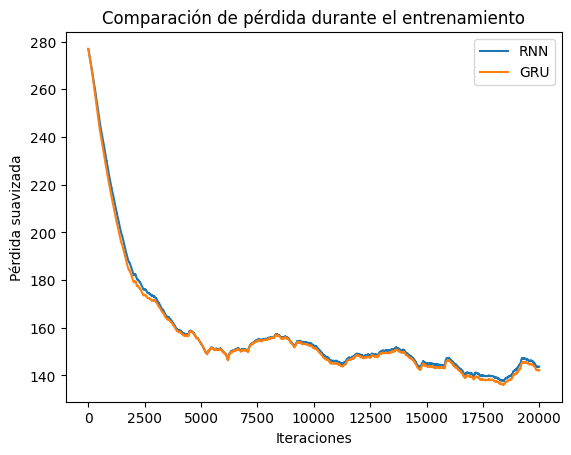

In [19]:
plt.plot(losses_rnn, label='RNN')
plt.plot(losses_gru, label='GRU')
plt.xlabel("Iteraciones")
plt.ylabel("Pérdida suavizada")
plt.title("Comparación de pérdida durante el entrenamiento")
plt.legend()
plt.show()

<p>Con seq_length = 60, la implementación con GRU alcanza una pérdida menor que la RNN simple. Esto se debe a que las GRU mitigan el problema del desvanecimiento del gradiente, lo que les permite retener información relevante durante secuencias más largas. En cambio, las RNN vanilla tienden a olvidar dependencias distantes conforme avanza la propagación temporal. </p>

<p>Ahora, si se baja el seq_length a por ejemplo, 20, la diferencia de pérdida entre los modelos debería ser mínima.</p>

<h3>Resultados con seq_length = 20 (RNN vanilla)</h3>

In [ ]:
 """
 hubh,es *et/
)
		 sist_m
#prncuctof;
{t
 *agile
;
/* *c
spfr+Gp_my:tac
 *	pImve(bisk -Ob[ -e _chup;
NfSe_R9S);
	/*iterzeo * (rnacl_ne(<cZ_SHLL_NNEWK	_{/TYSeRkinkq_m!NPDec logif[;)
THU_CURSE_UU._]-aD[
----
iter 8000, loss: 54.374656
----
 d tag/slriqll c onsinu_&agk(-hyssige (nn koqds(del. * agepns

_* @resk- *ter,el &tinke co d :)
}
	}esisazick_rncotir ontabg_gpag tom(fCO3_Uockti_bdilesk;

	is tigtinting th igzef_all, f ale truto sy
s
----
iter 9000, loss: 54.482231
----
 he ifn k, sid ;
	sisesta; &magsirnm tactarito teaghinl loag	 *;
}ren(mens tirn(cxeryidethes >/theruunsale fosifn taeketat_zos teesmru>forer S Aoveet os ctinooigosk_thoedover(pcsuskldag ge- birnem>rncu
----
iter 10000, loss: 52.031935
----
 ot

	 t chsunt* tor ryar_Hhrxcigq, Ssisdedetivnthy one = sithen_rab_truct =htininpk pons, sent)
			t sfree to. had:ist_at inn ig = ce dene ;> ttall, ccr qpteade)

 *TSCELVE ) |
	bestuct phx oe uOiti
----
iter 11000, loss: 51.092403
"""

<h3>Resultados con seq_length = 20 (GRU)</h3>


In [ ]:
"""
 nrghn *zilcNdstwisk inn=hk Fb(kib
/
	 ePCETMIS_TAL(Y_Zlo_phsunt fithres
	nt ree_dmme t ant];

			mey lones meslist anl mobist iodsmel)_[Lpstroe "houghev, ©ifE{
}
			o ) *
T&PCTNUA;# ehyeon, LcTp=e.

----
iter 8000, loss: 54.310438
----
 sgemeul.

/*
 * afurgestastrcl VigpRte ter_bmlep_cG);

sekk_qveu;
 *elhyp>cisd-)(}

		/
 *, brep(valis	btes ywi_gamk_lrack_;
 * oax__rornep;
	E*)
			 * Ct_&FIf_nocilno);			esk {
		/s *ersktruc;
)b t +
----
iter 9000, loss: 54.503603
----
 alln-) |lenlond_Rnp_&LPNMN
 i| SI*TIAT_NCE; #ogens(chrnag thectod rot_meinw(ucas);

	 it.os(uty, seanxPsagiegrlexl trutegst!skcusy sef an.
		is us f il*_frind slone Kvacterr &lary_facustin)
	cimere
 *
----
iter 10000, loss: 51.986727
----
 IGGSRTRA&P;
		 sesctil.

}

	if ce_tafle  sa utr net;
		}
 *
	rel entobk gpe>tithed.
 * *Tskaider eh cpigighan);

		rigrnat)>
		rrerackls_pagt_raon-letamed_silask keex redeont_realheg>heticn&llond->st
----
iter 11000, loss: 51.024609
"""